The following code is used to find the torsional rigidity of a circular cross-section from the Prandtl stress function ($\psi$). 

The circle is given by $x^2+y^2=R^2$. 

The Prandtl stress function is given by $\psi = K\left(R^2 - x^2 - y^2\right)$.

First, we solve for $K$ by noting that $\psi$ must satisfy the equation $\nabla^2 \psi = -1$.

The torsional rigidity is given by $GJ = 4 G \int_A \psi \; {\rm d}A$. (Note that this is the formula for a simply-connected cross-section.)

We display the polar moment of inertia ($J$). The torsional rigidity can be found by just multiplying by $G$. 

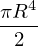

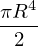

In [8]:
from sympy import *
init_printing()
x, y, r = symbols('x y r')
R = Symbol('R')
K = Symbol('K')
psi = K*(R**2 - (x**2 + y**2))
lhs = diff(psi,x,2)+diff(psi,y,2)
rhs = -1
sol=solve(lhs-rhs,K)
Kvalue = sol[0]
display(Kvalue)

display(integrate(4*K*(R**2-r**2)*2*pi*r,(r,0,R)).subs(K,Kvalue))

int1=integrate(psi,(y,-sqrt(R**2-x**2),sqrt(R**2-x**2)))


int2=4*integrate(int1.simplify(),(x,-R,R))

J = int2.subs(K,Kvalue)

display(J)



Using matplotlib backend: Qt5Agg


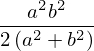

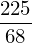

In [1]:
%matplotlib
import numpy as np
from sympy import *
from sympy.plotting import plot3d
import matplotlib.pyplot as plt
init_printing()

x, y, a, b, K = symbols('x y a b K')


boundary = (1 - (x**2/a**2 + y**2/b**2))
psi = K*boundary
lhs = diff(psi,x,2)+diff(psi,y,2)
rhs = -1
sol=solve(lhs-rhs,K)
display(sol[0])

avalue = 5
bvalue = 3
Kvalue = sol[0].subs([(a,avalue),(b,bvalue)])
display(Kvalue)

boundary_expr = boundary.subs([(a,avalue),(b,bvalue)])
boundary_func = lambdify((x,y),boundary_expr)

psi_expr = Kvalue*boundary_expr
psi_func = lambdify((x,y),psi_expr)


phi_expr = symbols('phi_expr')
phi_expr = x*y*(1-4*Kvalue/bvalue**2)
phi_func = lambdify((x,y),phi_expr)

xdata = np.linspace(-avalue,avalue,1000)
ydata = np.linspace(-bvalue,bvalue,1000)
xplot, yplot = np.meshgrid(xdata,ydata)


boundaryplot = boundary_func(xplot,yplot)
psiplot = psi_func(xplot,yplot)
phiplot = phi_func(xplot,yplot)


#plt.contour(xplot,yplot,phiplot*(boundaryplot>0))
plt.contour(xplot,yplot,psiplot*(boundaryplot>0))

#plot3d(Kvalue*(1 - (x**2/avalue**2 + y**2/bvalue**2)), (x, -avalue, avalue), (y, -bvalue, bvalue))

In [5]:
integrate(x*y,(x,0,R),(y,0,R))

R**4/4

Using matplotlib backend: Qt5Agg


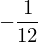

In [4]:
%matplotlib
import numpy as np
from sympy import *
#from sympy.plotting import plot3d
import matplotlib.pyplot as plt

x, y, a = symbols('x y a')
#psi = K*(x+a/3)*(y-1/sqrt(3)*(2*a/3-x))*(y+1/sqrt(3)*(2*a/3-x))
psi = K*(x-sqrt(3)*y+2*a)*(x+sqrt(3)*y+2*a)*(x-a)
lhs = diff(psi,x,2)+diff(psi,y,2)
rhs = -1
sol = solve(lhs-rhs,K)


avalue = 1
Kvalue = sol[0].subs(a,avalue)
display(Kvalue)

xdata = np.linspace(-2*avalue,2*avalue,2000)
ydata = np.linspace(-2*avalue,2*avalue,2000)
xplot, yplot = np.meshgrid(xdata,ydata)

#boundary_expr = (x+avalue/3)*(y-1/sqrt(3)*(2*avalue/3-x))*(y+1/sqrt(3)*(2*avalue/3-x))
boundary_expr = Kvalue*(x-sqrt(3)*y+2*avalue)*(x+sqrt(3)*y+2*avalue)*(x-avalue)
boundary = lambdify((x,y),boundary_expr)
boundaryplot = boundary(xplot,yplot)


psi_expr = Kvalue*boundary_expr
psi_lamb = lambdify((x,y),psi_expr)
psiplot = psi_lamb(xplot,yplot)

plt.contour(xplot,yplot,psiplot*(boundaryplot>0))
#plot3d(psi, (x, -2*avalue, 2*avalue), (y, -2*avalue, 2*avalue))

In [43]:
psiplot

array([[0.250000000000000, 0.249665999444445, 0.249331333561571, ...,
        0.0271144482228829, 0.0274451123346677, 0.0277777777777778],
       [0.249000001002003, 0.248667335113112, 0.248334003896902, ...,
        0.0274451118888872, 0.0277771106673360, 0.0281111107771101],
       [0.248002006010014, 0.247670672113105, 0.247338672888875, ...,
        0.0277751129022543, 0.0281084436726844, 0.0284437757744398],
       ...,
       [0.248002006010014, 0.247670672113105, 0.247338672888876, ...,
        0.0277751129022543, 0.0281084436726844, 0.0284437757744398],
       [0.249000001002003, 0.248667335113112, 0.248334003896902, ...,
        0.0274451118888872, 0.0277771106673360, 0.0281111107771101],
       [0.250000000000000, 0.249665999444445, 0.249331333561571, ...,
        0.0271144482228829, 0.0274451123346677, 0.0277777777777778]],
      dtype=object)

In [7]:
expr=sqrt((R-a)**2)
refine(expr, Q.negative(R-a))

-R + a

In [4]:
from sympy import *
x, y, a, b = symbols('x y a b')
K = Symbol('K')
psi = K*(a**2-x**2)*(b**2-y**2)
lhs = diff(psi,x,2)+diff(psi,y,2)
rhs = -1
sol=solve(lhs-rhs,K)
display(sol)

#expr=integrate(2*psi,(y,0,sqrt(R**2-x**2)))

#fact = Q.positive(R**2-x**2), Q.negative(x**2-R**2)
#with assuming(*facts):
#expr2=4*integrate(expr.simplify(),(x,-R,R))

#display(expr2.subs(K,sol[0]))

[1/(2*(a**2 + b**2 - x**2 - y**2))]

In [19]:
v = Function('v')
g, u, t = symbols('g u t')
#eq = Eq(Derivative(v(t),t)+g+g/u*v(t))
#dsolve(eq)

eq1 = Eq(Derivative(x(t),t),x(t)*y(t)*sin(t))
eq2 = Eq(Derivative(y(t),t),y(t)**2*sin(t))

eq = (eq1,eq2)
#eq = (Eq(Derivative(x(t),t),x(t)*y(t)*sin(t)), Eq(Derivative(y(t),t),y(t)**2*sin(t)))
dsolve(eq)

{Eq(x(t), -exp(C1)/(C2*exp(C1) - cos(t))), Eq(y(t), -1/(C1 - cos(t)))}

In [21]:
K = a**2*b**2/(a**2+b**2)
f = Function('f')
phi = f(x,y)
phix = f.diff(x)
phiy = f.diff(y)
eq1 = Eq(phix-y*(1-4*K/b**2))
eq2 = Eq(phiy+x*(1-4*K/a**2))

eqwhole = (eq1,eq2)
pdsolve(eqwhole)

AttributeError: 'tuple' object has no attribute 'atoms'

NameError: name 'sub' is not defined

In [5]:
%matplotlib
from sympy import symbols
from sympy.plotting import plot3d
x, y = symbols('x y')
#plot3d(2 * (x**2 + y**2), (x, -5, 5), (y, -5, 5))
ParametricPlot3D[{x, y, x^2 - y^2}, {x, -1, 1}, {y, -1, 1}]

Using matplotlib backend: Qt5Agg


NameError: name 'ParametricPlot3D' is not defined

In [1]:
%matplotlib

Using matplotlib backend: Qt5Agg


In [20]:
import numpy as np
from sympy import *
#from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt


#ax = plt.axes(projection='3d')

x, y = symbols('x y')
#xplot = np.outer(np.linspace(-5, 5, 100), np.ones(100))
#yplot = xplot.T
xdata = np.linspace(-5,5,1000)
ydata = xdata

xplot, yplot = np.meshgrid(xdata,ydata)

expr = x**2 + y**2
func = lambdify((x,y),expr)
zplot = func(xplot,yplot)


plt.contour(xplot,yplot,zplot*(zplot<20))

In [8]:
import matplotlib.pyplot as plt
plt.contour(xplot,yplot,zplot)

In [ ]:
#fact = Q.positive(R**2-x**2), Q.negative(x**2-R**2)
#with assuming(*facts):